In [3]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [4]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/FreeSampling/"
print("data path: ", data_path)

level: level3 & tutorial name: free-energy-calculation
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level3/free-energy-calculation/FreeSampling/


In [5]:
sigma = 3.405 # Angstrom
epsilon = 0.238 # Kcal/mol
U0 = 1.5*epsilon # Kcal/mol
delta = 0.5 # Angstrom
x0 = 5.0 # Angstrom
x = np.linspace(-25, 25, 50000)  # Angstrom
U = U0 * (np.arctan((x + x0) / delta) - np.arctan((x - x0) / delta))
F = (U0/delta)/(((x - x0)**2)/delta**2 + 1) - (U0/delta)/(((x + x0)**2)/delta**2 + 1)

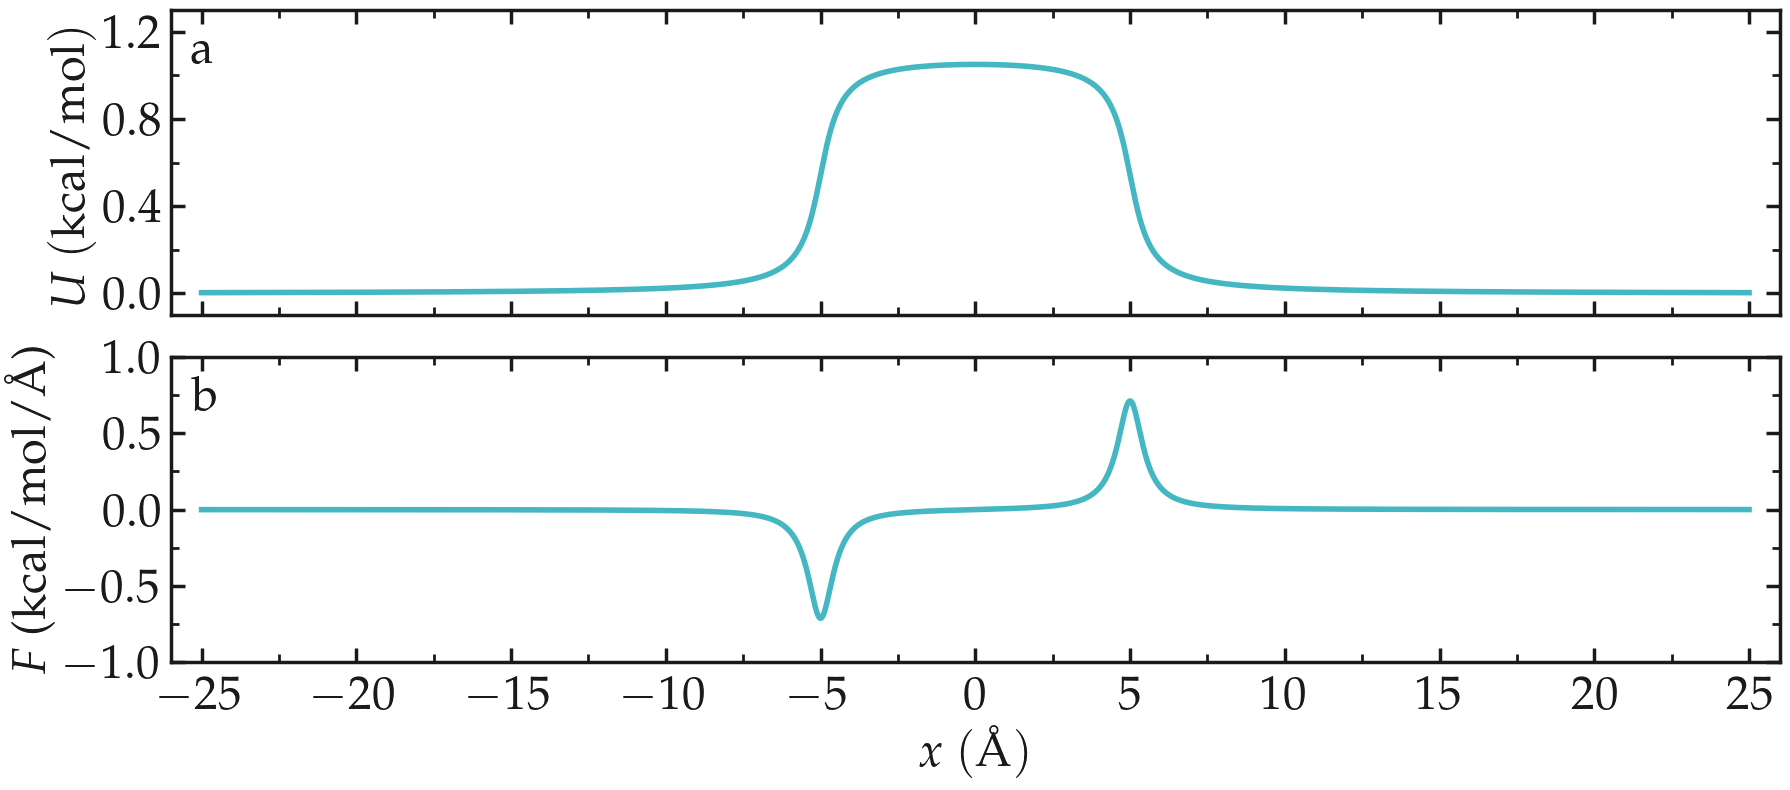

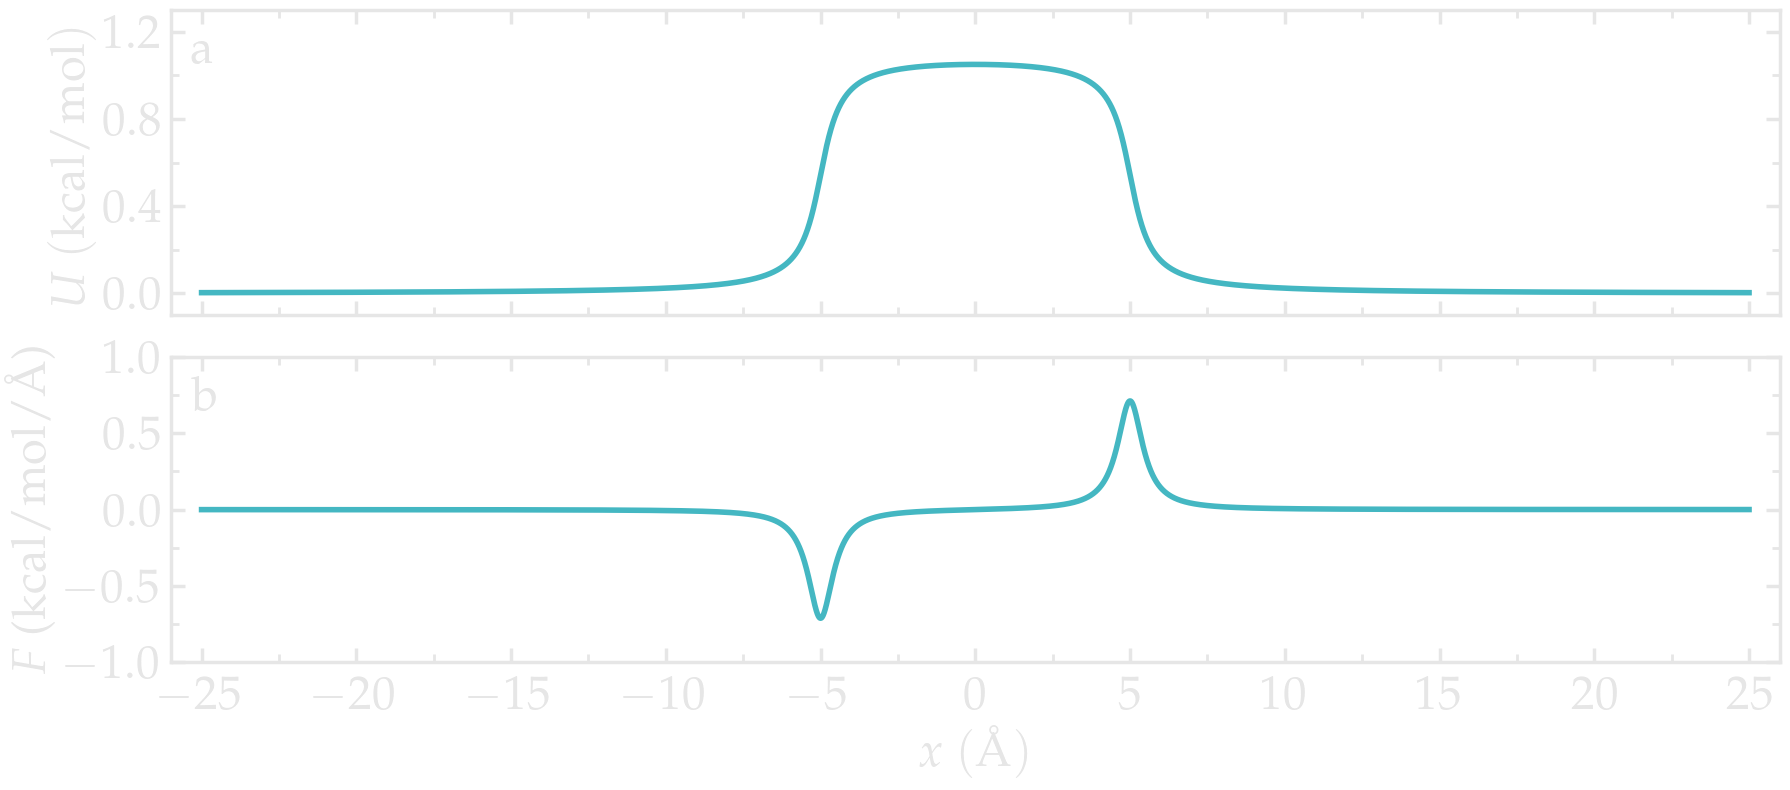

In [9]:
filename = "potential"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,8), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=2)
    myplt.add_panel()
    myplt.add_plot(x = x, y = U, linewidth_data = 3,
                   marker = "-", data_color = "autogray", markersize = 12)
    myplt.complete_panel(ylabel = r'$U ~ \mathrm{(kcal/mol)}$',
                         xlabel = None,
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-25, 30, 5), y_ticks=np.arange(0, 1.4, 0.4),
                   x_boundaries=(-26, 26), y_boundaries=(-0.1, 1.3))
    myplt.add_panel()
    myplt.add_plot(x = x, y = F, linewidth_data = 3,
                   marker = "-", data_color = "autogray", markersize = 12)
    myplt.complete_panel(ylabel = r'$F ~ \mathrm{(kcal/mol/\AA)}$',
                         xlabel = r'$x ~ \mathrm{(Å)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26),
                   y_ticks=np.arange(-1, 1.1, 0.5), y_boundaries=(-1, 1))
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

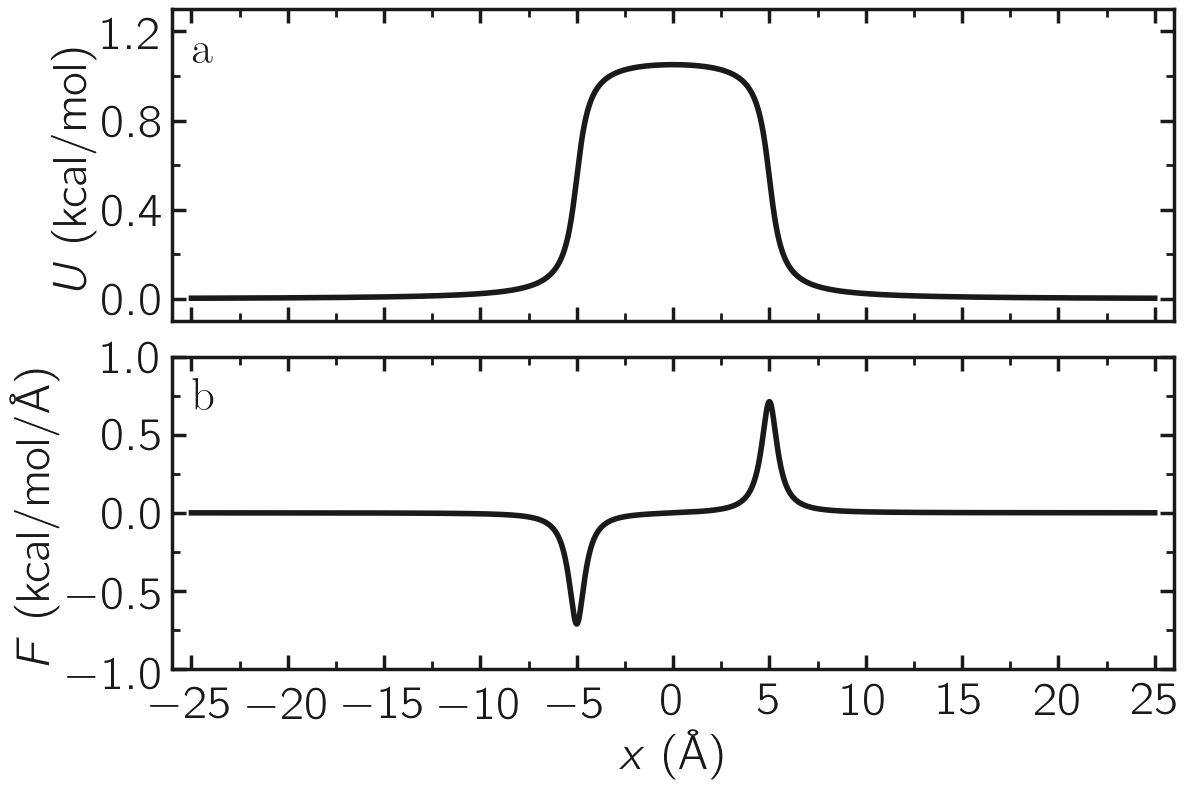

In [11]:
filename = "potential-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = x, y = U, linewidth_data = 3,
                marker = "-", data_color = "autogray", markersize = 12)
myplt.complete_panel(ylabel = r'$U ~ \mathrm{(kcal/mol)}$',
                        xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-25, 30, 5), y_ticks=np.arange(0, 1.4, 0.4),
                x_boundaries=(-26, 26), y_boundaries=(-0.1, 1.3))
myplt.add_panel()
myplt.add_plot(x = x, y = F, linewidth_data = 3,
                marker = "-", data_color = "autogray", markersize = 12)
myplt.complete_panel(ylabel = r'$F ~ \mathrm{(kcal/mol/\AA)}$',
                        xlabel = r'$x ~ \mathrm{(Å)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26),
                y_ticks=np.arange(-1, 1.1, 0.5), y_boundaries=(-1, 1))
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')

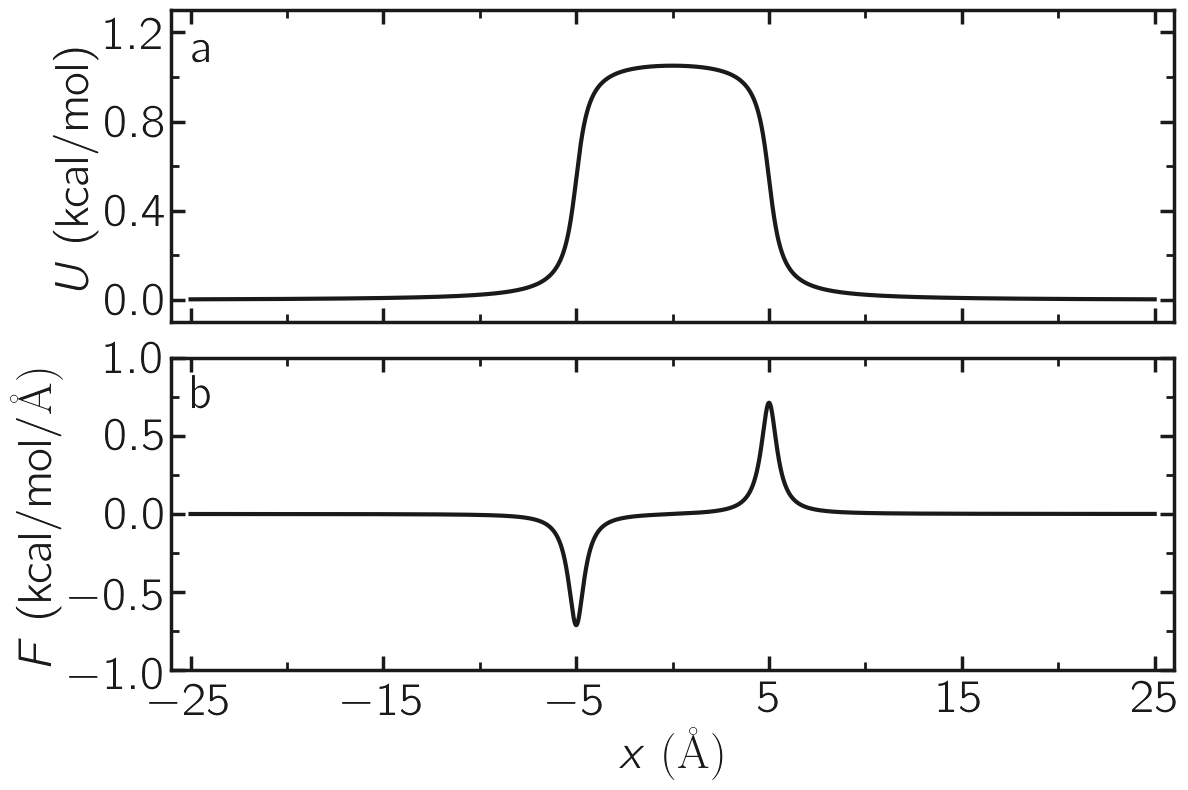

In [12]:
filename = "potential-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,8), serif=False)
ax, n, l_tot, c_tot = [], 0, 2, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(x, U, color=colors["mylightgray"], linewidth=3)
complete_panel(ax[-1], None, r'$U ~ \mathrm{(kcal/mol)}$', legend=False, axis_color=mygray)
set_boundaries(plt, x_ticks=np.arange(-25, 30, 10), y_ticks=np.arange(0, 1.4, 0.4),
                x_boundaries=(-26, 26), y_boundaries=(-0.1, 1.3))
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(x, F, color=colors["mylightgray"], linewidth=3)
complete_panel(ax[-1], r'$x ~ \textrm{(\AA{})}$', r'$F ~ \mathrm{(kcal/mol}/\textrm{\AA{})}$',
            legend=False, axis_color=mygray, locator_y=2, xpad=8)
set_boundaries(plt, x_ticks=np.arange(-25, 30, 10), x_boundaries=(-26, 26),
                y_ticks=np.arange(-1, 1.1, 0.5))
add_subplotlabels(fig, ax, [r"$\mathrm{a}$", r"$\mathrm{b}$"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)